#        Escaner de puertos abiertos utilizando nmap y python3 en kali linux
#                                Nombre: Cristhian Daniel Mauna Ledezma
#                                Curso: Ciberseguridad
#                                Fecha: Popayan junio 2025

Funcionamiento y explicación de todo el proceso en el siguiente enlace https://youtu.be/Q07w-DXpgqE

In [ ]:

#!/usr/bin/python3
#importacion de los modulos
import nmap   #es la herramienta nmap desde python a travès de su libreria
import tkinter as tk  #añadi esta funciòn para crear la interfaz grafica
from tkinter import messagebox, scrolledtext #se agrega un àrea de texto con scroll para mostrar resultados

#Funcion principal: escanear()
def escanear():
    ip = entry_ip.get() #se ejecuta cuando el usuario hace clic en el boton "Escanear"
    if not ip:          #Validacion de la entrada
        messagebox.showerror("Error", "Por favor ingresa una dirección IP") #valida que estè vacìo
        return

#Funcion de los puertos escanear con Nmap
    try:
        nm = nmap.PortScanner()
        results = nm.scan(hosts=ip, arguments="-sT -n -Pn -T4")

        salida.delete(1.0, tk.END)  # Limpiar resultados anteriores
        salida.insert(tk.END, f"Escaneando IP: {ip}\n")
        salida.insert(tk.END, f"Estado del host: {nm[ip].state()}\n")

        puertos_abiertos = [] #procesa protocolos y puertos
        for proto in nm[ip].all_protocols():
            salida.insert(tk.END, f"\nProtocolo: {proto}\n") #muestra resultados basicos
            lport = sorted(nm[ip][proto].keys())
            for port in lport:
                estado = nm[ip][proto][port]["state"]
                salida.insert(tk.END, f"Puerto: {port}\tEstado: {estado}\n")
                if estado == "open":
                    puertos_abiertos.append(str(port)) #guarda los puertos abiertos en una lista

        if puertos_abiertos: #muestra resumen de los puestos abiertos
            salida.insert(tk.END, f"\nPuertos abiertos: -p {','.join(puertos_abiertos)} {ip}\n")
        else:
            salida.insert(tk.END, "\nNo se encontraron puertos abiertos.\n")
    except Exception as e: #manejo de errores
        messagebox.showerror("Error", str(e))

# Crear ventana principal creacion de la interfaz gràfica
ventana = tk.Tk()
ventana.title("Escáner de Puertos con Nmap") # se le asigna un titulo
ventana.geometry("600x400") # se da el tamaño de la ventana

# Etiqueta e input para IP
tk.Label(ventana, text="IP Objetivo:").pack(pady=5)
entry_ip = tk.Entry(ventana, width=40)
entry_ip.pack(pady=5)

# Botón para escanear
btn_escanear = tk.Button(ventana, text="Escanear", command=escanear)
btn_escanear.pack(pady=5)

# Área de resultados
salida = scrolledtext.ScrolledText(ventana, width=70, height=15)
salida.pack(padx=10, pady=10)

# Ejecutar GUI
ventana.mainloop()

Introducción:

Se presentará un escáner de puertos abiertos utilizando Kali Linux, Python 3, nmap y una máquina virtual de metasploitable que es un sistema operativo de Linux vulnerable para simular ataques.

El escáner de puertos abiertos es importante en ciberseguridad porque permite identificar los servicios que están activos y accesibles en un sistema o red.

Las herramientas utilizadas fueron virtual box donde se virtualizaron los sistemas operativos (Kali Linux y metasploitable) Python 3 y Nmap, empleados para el desarrollo y ejecución de los scrips de escaneo; y subl.text que se utilizó como editor de texto para escribir y organizar el código.


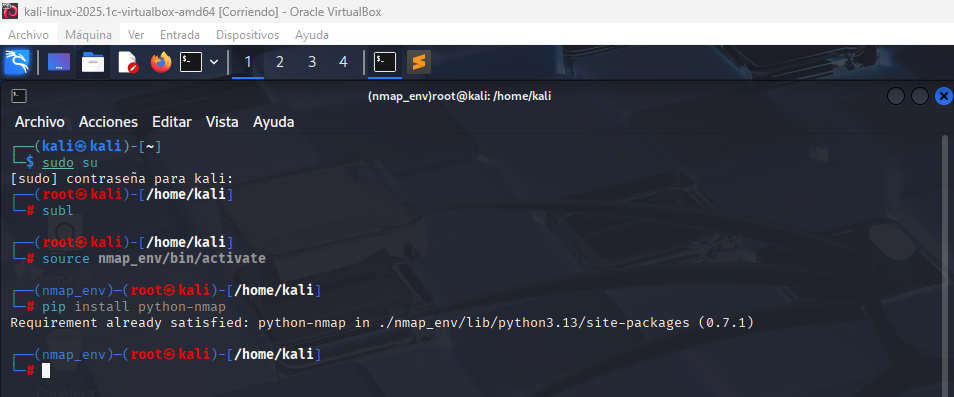

primero que todo se debe entrar como super usuario con el comando sudo su, luego abrir el editor de texto para montar el codigo que se va a trabajar, en mi caso trabaje con el editor de texto subl.text.

luego se debe ejecutar el comando (source nmap_env/bin/activate) se utiliza en sistemas basados en Unix (como Kali Linux) para activar un entorno virtual de Python.
source: es un comando de shell que ejecuta un archivo de script en el contexto del shell actual. En este caso, ejecuta el script activate.

nmap_env/bin/activate: es la ruta al script de activación del entorno virtual. nmap_env es el nombre del entorno virtual, y dentro de él, el archivo bin/activate contiene las instrucciones necesarias para configurar el entorno.

despues se debe ejecutar el comando para (pip install python-nmap) este paquete es un wrapper (envoltorio) en Python para la herramienta de escaneo de redes Nmap. Permite ejecutar Nmap desde scripts de Python y procesar fácilmente los resultados.



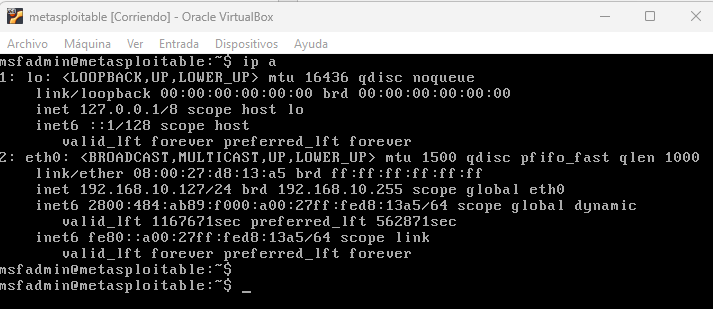

Se utilizaron dos máquinas virtuales una Kali Linux que es donde se va a montar todo el proceso. La herramienta principal es Nmap, completada con un script en Python 3 utilizando la librería de Python-nmap y  la otra maquina es la de metasploitable que es donde va a ir dirigido el ataque y me despliegue que puertos están abiertos.

Desarrollo del escáner

Se diseño un script en Python que automatiza el uso de Nmap para escanear los puertos abiertos a continuación se mostrara el código completo.


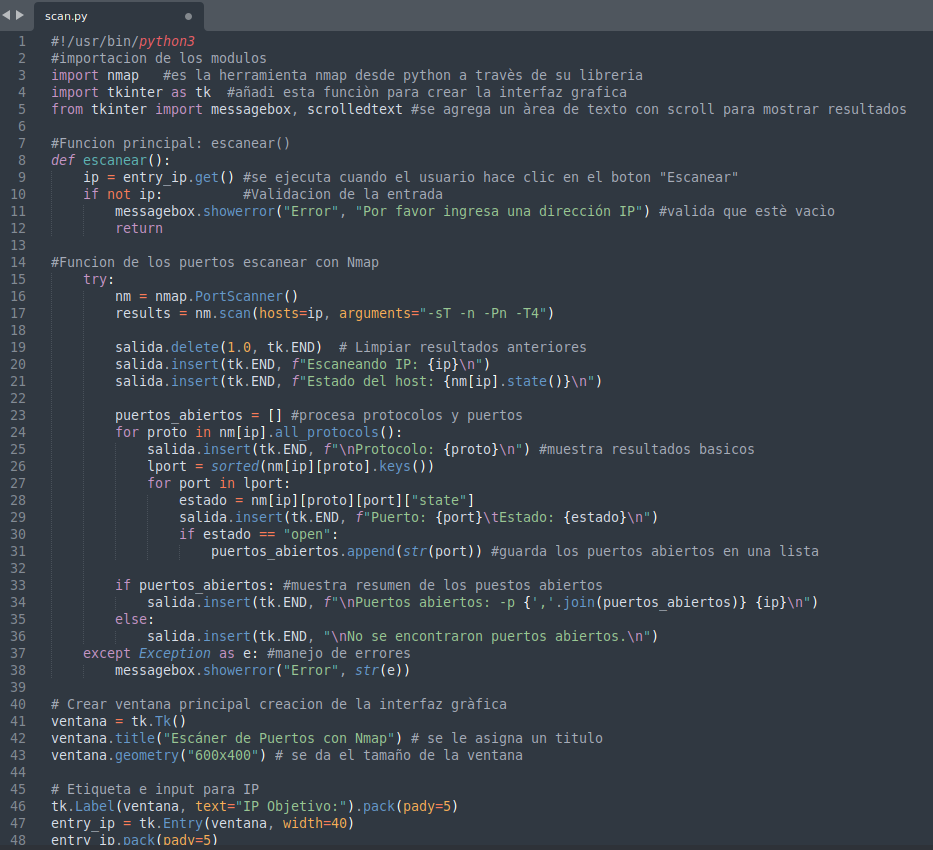

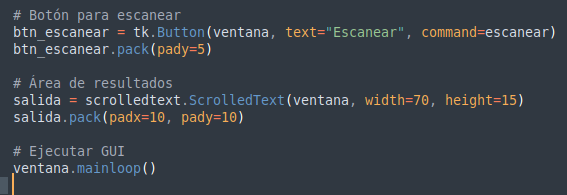

Para ejecutar este código hay que dirigirse a la línea de comandos en Kali Linux y ejecutar el comando python3 scan.py

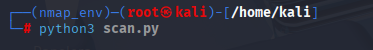

¿Qué hace python3 scan.py?
Este comando:

Se usa Python 3 para ejecutar un archivo llamado scan.py.
scan.py es un script de Python, y su contenido determinará qué hace exactamente (en efecto, podría usar python-nmap para escanear la direccion IP que se va a escanear).

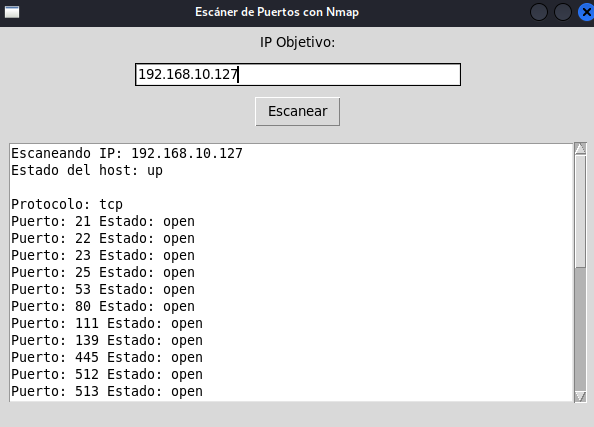

Luego de ejecutar el anterior comando se va a desplegar la ventana para ingresar la direccion IP de Metasploitable, una vez colocada la direccion IP le damos Click en escanear y se desplegara todos los puertos que tenemos abiertos lo que siguinifica que estamos vulnerables a cualquier tipo de ciberataque.

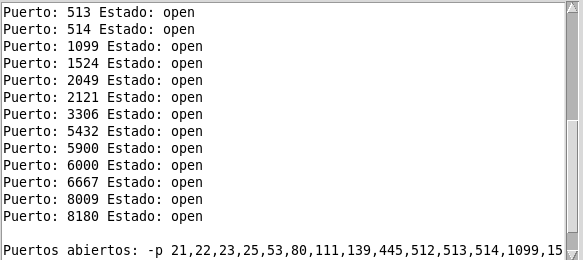

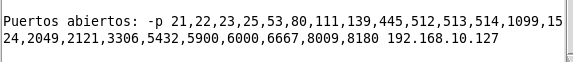

Al hacer el escaneo a la dirección IP 192.168.10.127 que es la dirección IP de la máquina de metasploitable se identificaron múltiples puertos abiertos y servicios asociados como el SSH, HTTP entre otros.

Conclusiones y Recomendaciones

El proyecto permitió entender el funcionamiento y lo que se debe tener en cuenta, la importancia de los puertos en ciberseguridad. Como recomendación actualizar de manera regular los servicios expuestos y limitar el acceso desde redes externas porque al conectarse a este tipo de redes podemos quedar expuestos atacantes y puede ser peligroso.


Funcionamiento y explicación de todo el proceso en el siguiente enlace
https://youtu.be/Q07w-DXpgqE